In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [7]:
df['asymptomatic'] = df['cp'].apply(lambda x: 1 if x == 0 else 0)
df['typicalangina'] = df['cp'].apply(lambda x: 1 if x == 1 else 0)
df['atypicalangina'] = df['cp'].apply(lambda x: 1 if x == 2 else 0)
df['nonanginalpain'] = df['cp'].apply(lambda x: 1 if x == 3 else 0)

In [8]:
df = df.drop('cp',axis=1)

In [9]:
df.head()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,asymptomatic,typicalangina,atypicalangina,nonanginalpain
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


In [10]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [11]:
df['hypertrophy'] = df['restecg'].apply(lambda x: 1 if x == 0 else 0)
df['normal'] = df['restecg'].apply(lambda x: 1 if x == 1 else 0)
df['waveabnormality'] = df['restecg'].apply(lambda x: 1 if x == 2 else 0)

In [12]:
df = df.drop('restecg',axis=1)

In [13]:
df['downsloping'] = df['slp'].apply(lambda x: 1 if x == 0 else 0)
df['flat'] = df['slp'].apply(lambda x: 1 if x == 1 else 0)
df['unsloping'] = df['slp'].apply(lambda x: 1 if x == 2 else 0)

In [14]:
df = df.drop('slp',axis=1)

In [15]:
df['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [16]:
df['fixeddefectthal'] = df['thall'].apply(lambda x: 1 if x == 1 else 0)
df['normalthal'] = df['thall'].apply(lambda x: 1 if x == 2 else 0)
df['reversabledefectthal'] = df['thall'].apply(lambda x: 1 if x == 3 else 0)

In [17]:
df.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,thall,...,nonanginalpain,hypertrophy,normal,waveabnormality,downsloping,flat,unsloping,fixeddefectthal,normalthal,reversabledefectthal
0,63,1,145,233,1,150,0,2.3,0,1,...,1,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,2,...,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,2,...,0,1,0,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,0,2,...,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,2,...,0,0,1,0,0,0,1,0,1,0


In [18]:
df = df.drop('thall',axis=1)

In [19]:
df.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,nonanginalpain,hypertrophy,normal,waveabnormality,downsloping,flat,unsloping,fixeddefectthal,normalthal,reversabledefectthal
0,63,1,145,233,1,150,0,2.3,0,1,...,1,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,1,0,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,0,1,0,1,0


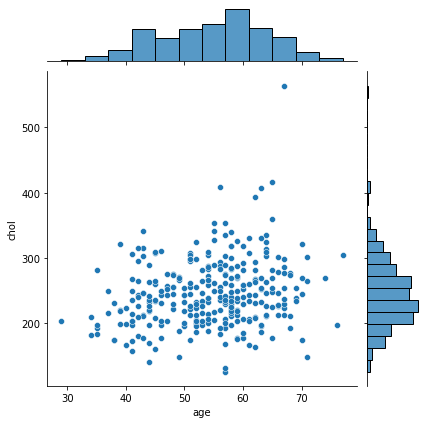

In [20]:
sns.jointplot(x='age',y='chol',data=df)

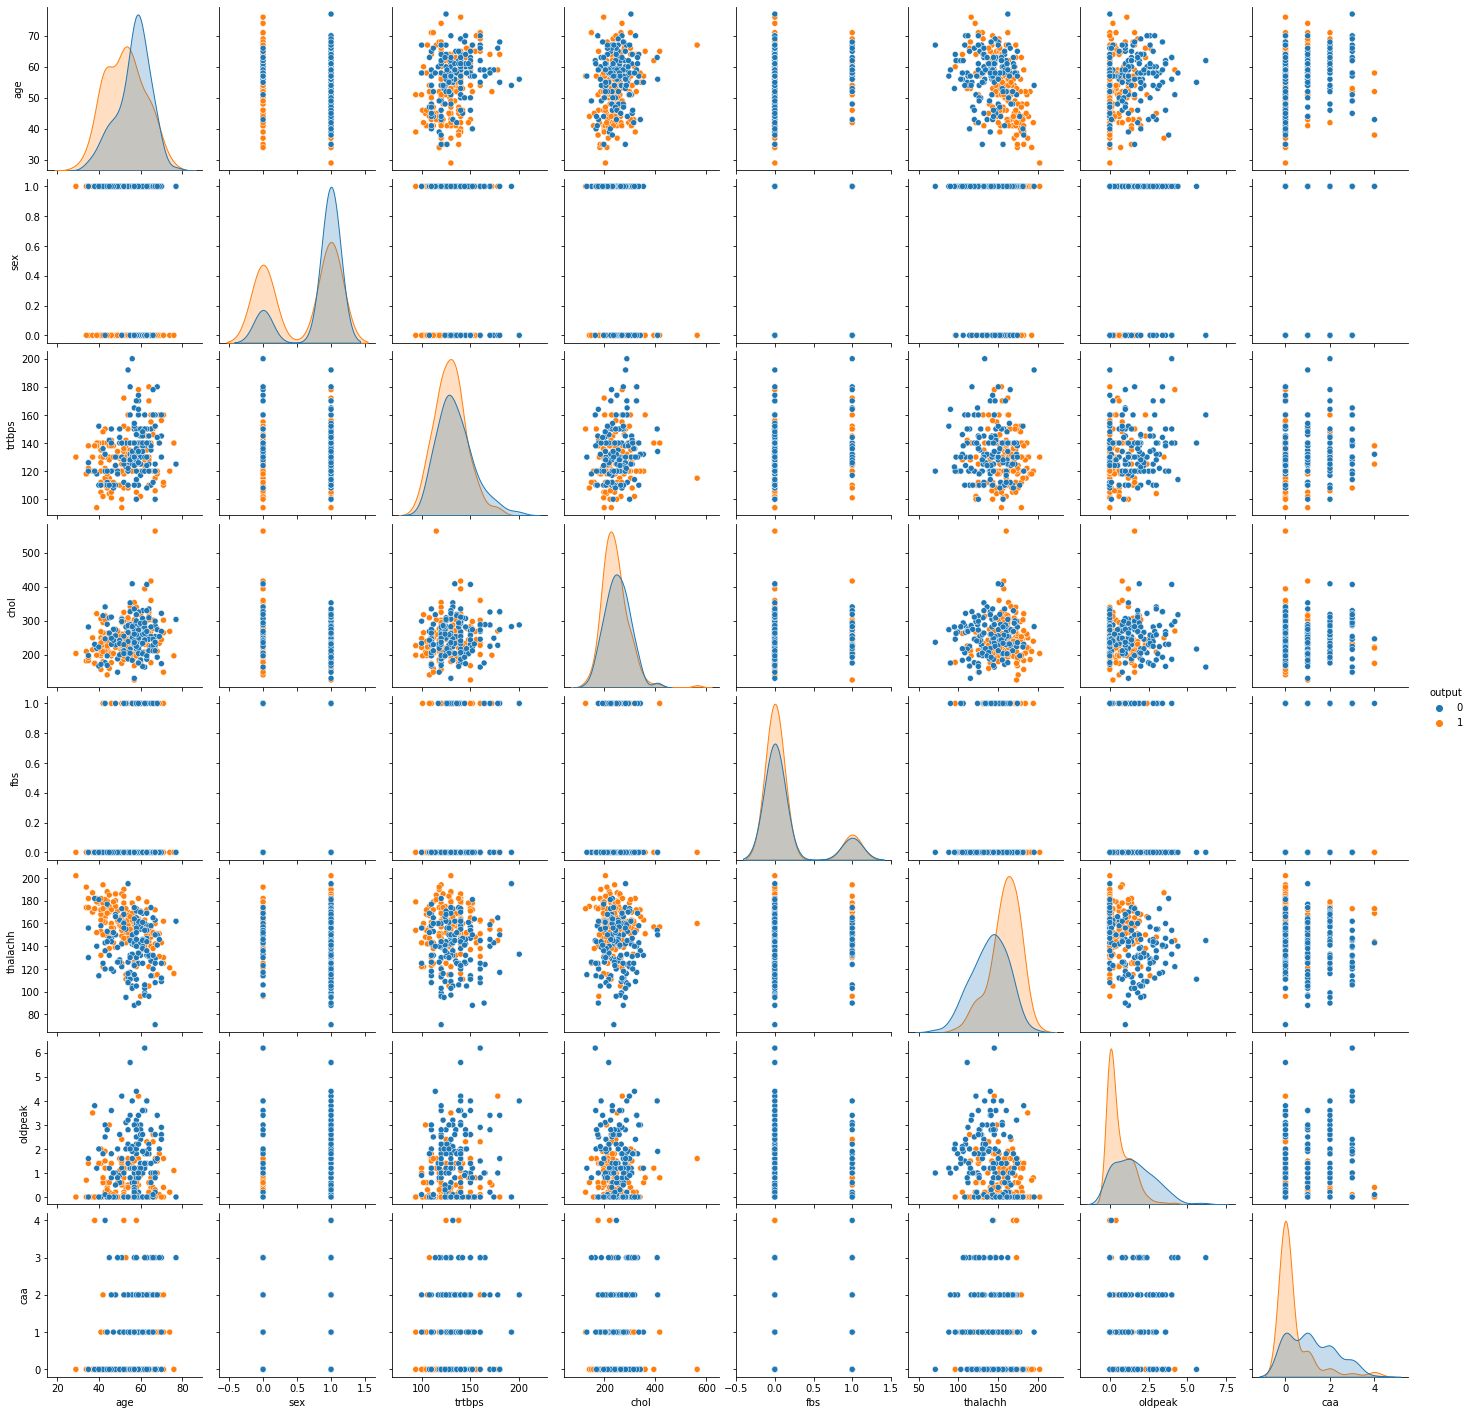

In [21]:
sns.pairplot(df[['age','sex','trtbps','chol','fbs','thalachh','oldpeak','caa','output']],hue='output')

<AxesSubplot:>

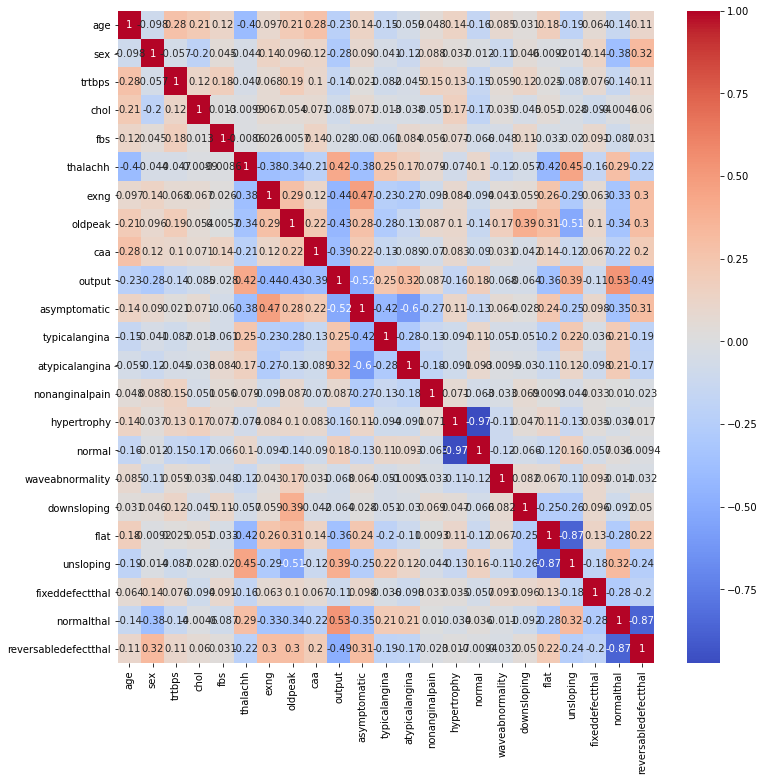

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in df.columns if df[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    df[col] = scaled[col].copy()
    
df.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,nonanginalpain,hypertrophy,normal,waveabnormality,downsloping,flat,unsloping,fixeddefectthal,normalthal,reversabledefectthal
0,0.708333,1,0.481132,0.244292,1,0.603053,0,0.370968,0.0,1,...,1,1,0,0,1,0,0,1,0,0
1,0.166667,1,0.339623,0.283105,0,0.885496,0,0.564516,0.0,1,...,0,0,1,0,1,0,0,0,1,0
2,0.250000,0,0.339623,0.178082,0,0.770992,0,0.225806,0.0,1,...,0,1,0,0,0,0,1,0,1,0
3,0.562500,1,0.245283,0.251142,0,0.816794,0,0.129032,0.0,1,...,0,0,1,0,0,0,1,0,1,0
4,0.583333,0,0.245283,0.520548,0,0.702290,1,0.096774,0.0,1,...,0,0,1,0,0,0,1,0,1,0


In [23]:
X = df.drop(['output'],axis=1)
y = df['output']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 54.25
% Positive class in Test  = 54.95


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)

logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report,precision_score, recall_score, f1_score

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [25]:
pip install imbalanced_learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (303, 22)
Shape of X after SMOTE: (330, 22)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: output, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3)

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
logpredictions = logmodel.predict(X_test)
print(classification_report(y_test,logpredictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        50
           1       0.86      0.86      0.86        49

    accuracy                           0.86        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.86      0.86      0.86        99



In [28]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)
rfpredictions = rfmodel.predict(X_test)
print(classification_report(y_test,rfpredictions))

df_rfmodel = pd.DataFrame({'Model':'Random Forest',
                      'Precision':[precision_score(y_test, rfpredictions, average='macro')],
                      'Recall':[recall_score(y_test, rfpredictions, average='macro')],
                      'F1-score':[f1_score(y_test, rfpredictions,average='macro')]})

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.86      0.88      0.87        49

    accuracy                           0.87        99
   macro avg       0.87      0.87      0.87        99
weighted avg       0.87      0.87      0.87        99



In [32]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 100  # The number of training iterations

xgmodel = xgb.train(param, D_train, steps)

xgpredictions = xgmodel.predict(D_test)
xgbest_preds = np.asarray([np.argmax(line) for line in xgpredictions])

print(classification_report(y_test,xgbest_preds))

[17:26:53] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.82      0.86      0.84        49

    accuracy                           0.84        99
   macro avg       0.84      0.84      0.84        99
weighted avg       0.84      0.84      0.84        99



In [33]:
importance = pd.DataFrame(data=rfmodel.feature_importances_,index=X.columns,columns=['Feature Importance'])
importance.sort_values(by='Feature Importance',ascending = False)

,Feature Importance
thalachh,0.127120
caa,0.126032
oldpeak,0.103393
asymptomatic,0.103282
age,0.080137
normalthal,0.079003
trtbps,0.068265
chol,0.064538
reversabledefectthal,0.039950
sex,0.030963
